## 1. Load the packages and dataframes

In [ ]:
import sys
import os
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Add the project root to the system path
PROJECT_ROOT = Path.cwd().resolve().parent
print(f"Project root: {PROJECT_ROOT}")
sys.path.append(str(PROJECT_ROOT))




Project root: /Users/bharathbeeravelly/Desktop/mlops-loan-payback


In [7]:
NOTEBOOKS_DIR = PROJECT_ROOT / "notebooks"
DATA_DIR = PROJECT_ROOT / "data"
RAW_DATA_PATH = DATA_DIR / "raw"
PROCESSED_DATA_PATH = DATA_DIR / "processed"

In [9]:
# Load the dataframe
train_df = pd.read_csv(PROCESSED_DATA_PATH / "local_train.csv")


## 2. EDA


### 2.1 Missing Value Analysis

In [10]:
train_df.head()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,92432.16,0.067,636,14369.05,13.78,Male,Married,Bachelor's,Employed,Debt consolidation,D1,1.0
1,28850.38,0.122,643,8471.26,14.40,Female,Married,High School,Employed,Debt consolidation,D5,1.0
2,39427.43,0.041,672,7647.50,11.99,Male,Married,High School,Employed,Debt consolidation,C3,1.0
3,71644.31,0.208,646,7125.57,12.19,Female,Single,High School,Unemployed,Car,D3,0.0
4,69010.47,0.186,708,10659.02,15.09,Male,Married,Bachelor's,Employed,Medical,C4,1.0


In [11]:
train_df.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,475195.000000,475195.000000,475195.000000,475195.000000,475195.000000,475195.000000
mean,48221.737087,0.120632,680.918497,15025.190161,12.357129,0.798819
std,26733.808141,0.068478,55.407560,6929.253596,2.007715,0.400883
min,6002.430000,0.011000,395.000000,500.370000,3.320000,0.000000
25%,27920.860000,0.072000,646.000000,10279.040000,10.990000,1.000000
50%,46621.540000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18870.480000,13.680000,1.000000
max,393381.740000,0.577000,849.000000,48959.950000,20.990000,1.000000


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475195 entries, 0 to 475194
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         475195 non-null  float64
 1   debt_to_income_ratio  475195 non-null  float64
 2   credit_score          475195 non-null  int64  
 3   loan_amount           475195 non-null  float64
 4   interest_rate         475195 non-null  float64
 5   gender                475195 non-null  object 
 6   marital_status        475195 non-null  object 
 7   education_level       475195 non-null  object 
 8   employment_status     475195 non-null  object 
 9   loan_purpose          475195 non-null  object 
 10  grade_subgrade        475195 non-null  object 
 11  loan_paid_back        475195 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 43.5+ MB


No missing values. 

### 2.2 Target Variable Analysis

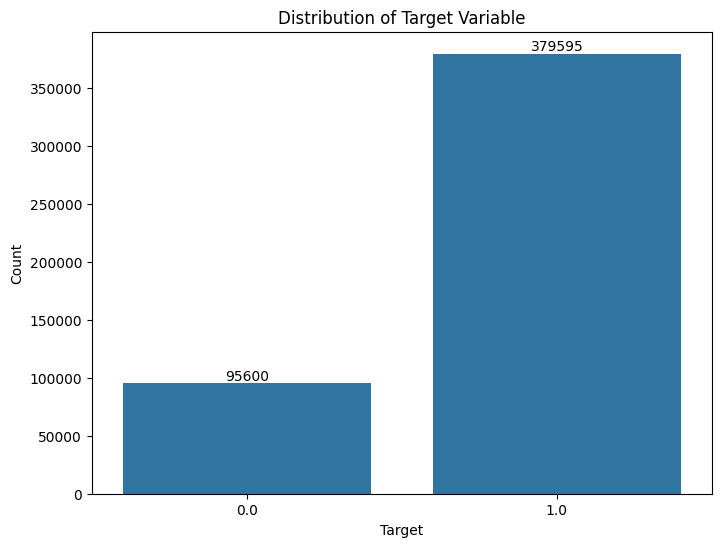

In [15]:
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='loan_paid_back', data=train_df)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()